In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [76]:
# Set random seed for reproducibility
torch.manual_seed(101)

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='../DATA', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../DATA', train=False, download=True, transform=transform)

In [77]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

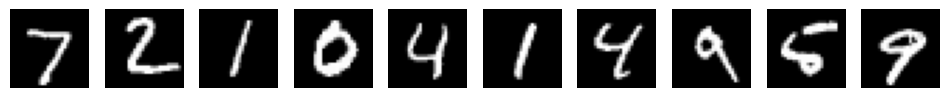

In [78]:
# Display several MNIST images
num_images_to_display = 10
sample_images, sample_labels = next(iter(test_loader))
plot_images(
    sample_images[:num_images_to_display]
  )

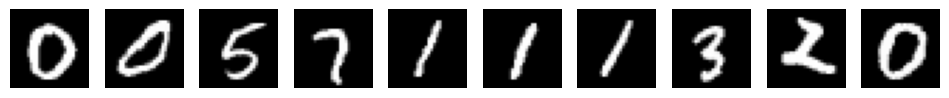

In [79]:
#define a functon to plot images
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

#get some images
images, labels = next(iter(train_loader))
plot_images(images[:10])

In [80]:
# Define the neural network model
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size=784, output_size=10, layers=[120, 84]):
        super().__init__()
        self.d1 = nn.Linear(input_size, layers[0])
        self.d2 = nn.Linear(layers[0], layers[1])
        self.d3 = nn.Linear(layers[1], output_size)

    def forward(self, x):
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        x = self.d3(x)
        return F.log_softmax(x, dim=1)

In [81]:
# Initialize the model
model = MultilayerPerceptron()

In [82]:
# Define loss function, optimizer, and learning rate
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [83]:
def train(model, train_loader, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


# Calculate the number of correctly classified images
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        # Calculate accuracy
        accuracy = 100 * correct_predictions / total_samples


        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader)} - Accuracy: {accuracy:.2f}%")

# Memanggil fungsi train
train(model, train_loader, optimizer, criterion, epochs=10)

Epoch 1/10 - Loss: 0.3915825005906668 - Accuracy: 88.59%
Epoch 2/10 - Loss: 0.1867417422637566 - Accuracy: 94.37%
Epoch 3/10 - Loss: 0.13483183812111743 - Accuracy: 95.90%
Epoch 4/10 - Loss: 0.11075590833274922 - Accuracy: 96.56%
Epoch 5/10 - Loss: 0.09476532979008517 - Accuracy: 97.01%
Epoch 6/10 - Loss: 0.08239468163984424 - Accuracy: 97.46%
Epoch 7/10 - Loss: 0.07451657234216487 - Accuracy: 97.56%
Epoch 8/10 - Loss: 0.06707883677107772 - Accuracy: 97.89%
Epoch 9/10 - Loss: 0.06248795547570263 - Accuracy: 98.01%
Epoch 10/10 - Loss: 0.05519420667978397 - Accuracy: 98.24%


masih kurang menampilkan nilai akurasi

In [84]:
# Evaluate the model
def evaluate(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.view(inputs.size(0), -1))
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    return all_targets, all_predictions

true_labels, predicted_labels = evaluate(model, test_loader)

In [85]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9745


In [86]:
# Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 970    0    0    1    0    1    1    3    0    4]
 [   1 1127    0    1    0    1    3    1    1    0]
 [   5    2 1013    2    1    0    1    4    4    0]
 [   3    0    5  981    0   10    0    3    4    4]
 [   2    0    2    0  963    0    5    0    0   10]
 [   4    0    0    6    2  872    4    0    0    4]
 [   4    2    1    1    4    5  939    0    2    0]
 [   0    6   13    2    2    0    0  997    1    7]
 [   4    2    9    7    6    8    0    3  929    6]
 [   1    2    0    6   32    3    0    9    2  954]]


In [87]:
# Calculate other performance metrics
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.95      0.98      0.97       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



ini adalah cara klasifikasi deep learning, berawal dari memasukan librarynya, lalu menormalisasikan, hingga mendownload dan me-train dan testing data. setelah itu saya menvisualisasi data by images dari 2 codingan yang berbeda. lalu saya menggunakan nn.Model yaitu MultilayerPerceptron. tahap selanjutnya yaitu mendefine loss function, optimizer dan learning rate-nya. lalu men-train model, train_loader, optimizer, criterion, dan epoch dengan 10. dapat 10 epoch dengan loss dan accuracynya.
setelah itu saya melakukan evaluate model, confusion matrix dan classification report untuk melihat precision, recall, fi score dan accuracy-nya.
codingan dari Bapak Dosen Asri Fajri dengan saya memahami dan membenarkan beberapa codingan yang error.